<a href="https://colab.research.google.com/github/VenkatRamana125/NLP-Projects/blob/main/Amazon_Product_Reviews_Sentiment_Analysis_Through_NLP_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords	

In [ ]:
from google.colab import files
uploads= files.upload()

Saving Amazon_indeed_reviews.csv to Amazon_indeed_reviews.csv


In [ ]:
data= pd.read_csv("Amazon_indeed_reviews.csv")

In [ ]:
data.head()


,Unnamed: 0,Reviewer_designation,Job_Title,Employee_Status,City,State,Full_Location,Date,Title,Comment,Pros,Cons,User_Rating,Company
0,0,HR Generalist (Former Employee),HR Generalist,Former Employee,London,Greater London,"London, Greater London","December 20, 2021",Good place for progression if you can handle t...,"Good for a graduate job, if you want quick pro...","High-ish annual pay, but when you factor in th...","long hours, no organisation, stressful, sink o...",3,Amazon.com
1,1,Amazon Fulfillment Associate (Former Employee),Amazon Fulfillment Associate,Former Employee,Monee,IL,"Monee, IL","December 20, 2021",Terrible Company,There’s no room for growth if you aren’t the r...,4 day schedule,"Mandatory 60hrs, The pay, The RSU’s no longer ...",1,Amazon.com
2,2,Learning Manager (Former Employee),Learning Manager,Former Employee,Calgary,AB,"Calgary, AB","December 20, 2021",this company doesn't care about you,"stressful, no balance, not worth it. will make...",,,1,Amazon.com
3,3,Warehouse Associate (Former Employee),Warehouse Associate,Former Employee,Hazelwood,MO,"Hazelwood, MO","December 20, 2021",Very fast paced work environment,It was an okay job. I think my job was very ea...,I liked the 20 min breaks. The Pay was awesome.,"everyone was sore after work, you couldn't rea...",3,Amazon.com
4,4,Driver (Current Employee),Driver,Current Employee,Jacksonville,FL,"Jacksonville, FL","December 20, 2021",Cool,Cool coworkers enjoy driving the van. Workout ...,,,5,Amazon.com


In [ ]:
data.tail()


,Unnamed: 0,Reviewer_designation,Job_Title,Employee_Status,City,State,Full_Location,Date,Title,Comment,Pros,Cons,User_Rating,Company
595,595,FC Associate 1 (Former Employee),FC Associate 1,Former Employee,Coppell,TX,"Coppell, TX","November 24, 2021",Great,Loved it!. Extremely noisy which is why I had ...,,,4,Amazon.com
596,596,Package Handler (Former Employee),Package Handler,Former Employee,Charlotte,NC,"Charlotte, NC","November 24, 2021",hard work,very hard working envoirment to be in very str...,none,evrerything,1,Amazon.com
597,597,Package Handler (Current Employee),Package Handler,Current Employee,Channahon,IL,"Channahon, IL","November 24, 2021",Great pay for the work,Some managers can be kind of incompetent and t...,Pay,mandatory overtime,3,Amazon.com
598,598,Fulfillment Associate (Former Employee),Fulfillment Associate,Former Employee,Brampton,ON,"Brampton, ON","November 24, 2021",Great benefits and career advancement opportun...,Amazon is a great place to work as the managem...,,,5,Amazon.com
599,599,Amazon Warehouse Associate (Current Employee),Amazon Warehouse Associate,Current Employee,Corona,NY,"Corona, NY","November 24, 2021",Productive and helps you keep in shape,Amazon is a great place to work if you like do...,,,5,Amazon.com


In [ ]:
print(data.shape)

(600, 14)


In [ ]:
data.info()	

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            600 non-null    int64 
 1   Reviewer_designation  600 non-null    object
 2   Job_Title             600 non-null    object
 3   Employee_Status       600 non-null    object
 4   City                  600 non-null    object
 5   State                 600 non-null    object
 6   Full_Location         600 non-null    object
 7   Date                  600 non-null    object
 8   Title                 600 non-null    object
 9   Comment               600 non-null    object
 10  Pros                  600 non-null    object
 11  Cons                  600 non-null    object
 12  User_Rating           600 non-null    int64 
 13  Company               600 non-null    object
dtypes: int64(2), object(12)
memory usage: 65.8+ KB


In [ ]:
from textblob import TextBlob

In [ ]:
data['Comment'] = data['Comment'].astype(str)


In [ ]:
pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

In [ ]:
data['Polarity'] = data['Comment'].apply(pol)
data['Subjectivity'] = data['Comment'].apply(sub)


In [ ]:
data.head(20)

,Unnamed: 0,Reviewer_designation,Job_Title,Employee_Status,City,State,Full_Location,Date,Title,Comment,Pros,Cons,User_Rating,Company,Polarity,Subjectivity
0,0,HR Generalist (Former Employee),HR Generalist,Former Employee,London,Greater London,"London, Greater London","December 20, 2021",Good place for progression if you can handle t...,"Good for a graduate job, if you want quick pro...","High-ish annual pay, but when you factor in th...","long hours, no organisation, stressful, sink o...",3,Amazon.com,0.356528,0.565000
1,1,Amazon Fulfillment Associate (Former Employee),Amazon Fulfillment Associate,Former Employee,Monee,IL,"Monee, IL","December 20, 2021",Terrible Company,There’s no room for growth if you aren’t the r...,4 day schedule,"Mandatory 60hrs, The pay, The RSU’s no longer ...",1,Amazon.com,0.267857,0.517857
2,2,Learning Manager (Former Employee),Learning Manager,Former Employee,Calgary,AB,"Calgary, AB","December 20, 2021",this company doesn't care about you,"stressful, no balance, not worth it. will make...",,,1,Amazon.com,-0.375000,0.500000
3,3,Warehouse Associate (Former Employee),Warehouse Associate,Former Employee,Hazelwood,MO,"Hazelwood, MO","December 20, 2021",Very fast paced work environment,It was an okay job. I think my job was very ea...,I liked the 20 min breaks. The Pay was awesome.,"everyone was sore after work, you couldn't rea...",3,Amazon.com,0.237619,0.593878
4,4,Driver (Current Employee),Driver,Current Employee,Jacksonville,FL,"Jacksonville, FL","December 20, 2021",Cool,Cool coworkers enjoy driving the van. Workout ...,,,5,Amazon.com,0.364394,0.575000
5,5,Delivery Service partner (Current Employee),Delivery Service partner,Current Employee,Bellmawr,NJ,"Bellmawr, NJ","December 20, 2021",Amazon Flex program was okay,I was part of the amazon flex program. Which a...,,,3,Amazon.com,0.033333,0.883333
6,6,FC Associatei (Former Employee),FC Associatei,Former Employee,Davenport,FL,"Davenport, FL","December 20, 2021",Never worked here before.,I have never worked for Amazon.com I have only...,,,4,Amazon.com,0.333333,0.600000
7,7,Package Handler (Current Employee),Package Handler,Current Employee,Carteret,NJ,"Carteret, NJ","December 20, 2021","Always busy, something to do",Modern slavery. It’s pretty basic too work her...,None at the moment,Short breaks,2,Amazon.com,0.183333,0.629167
8,8,Amazon Stow Associate (Current Employee),Amazon Stow Associate,Current Employee,Ottawa,ON,"Ottawa, ON","December 20, 2021",The environment of the work is good but the wo...,Yes I enjoy working in Amazon but the is high ...,I need to understand how I can improve my prod...,,3,Amazon.com,0.114167,0.444167
9,9,Software Engineer Intern (Former Employee),Software Engineer Intern,Former Employee,Bellevue,WA,"Bellevue, WA","December 19, 2021",Had a great internship experience at AWS,I was a software engineer intern. I was very l...,,,5,Amazon.com,0.295833,0.650000


In [ ]:
Good_Review = pd.DataFrame(data['User_Rating'] >= 3)


In [ ]:
data['Good_Review'] = Good_Review

In [ ]:
data.head()

,Unnamed: 0,Reviewer_designation,Job_Title,Employee_Status,City,State,Full_Location,Date,Title,Comment,Pros,Cons,User_Rating,Company,Polarity,Subjectivity,Good_Review
0,0,HR Generalist (Former Employee),HR Generalist,Former Employee,London,Greater London,"London, Greater London","December 20, 2021",Good place for progression if you can handle t...,"Good for a graduate job, if you want quick pro...","High-ish annual pay, but when you factor in th...","long hours, no organisation, stressful, sink o...",3,Amazon.com,0.356528,0.565000,True
1,1,Amazon Fulfillment Associate (Former Employee),Amazon Fulfillment Associate,Former Employee,Monee,IL,"Monee, IL","December 20, 2021",Terrible Company,There’s no room for growth if you aren’t the r...,4 day schedule,"Mandatory 60hrs, The pay, The RSU’s no longer ...",1,Amazon.com,0.267857,0.517857,False
2,2,Learning Manager (Former Employee),Learning Manager,Former Employee,Calgary,AB,"Calgary, AB","December 20, 2021",this company doesn't care about you,"stressful, no balance, not worth it. will make...",,,1,Amazon.com,-0.375000,0.500000,False
3,3,Warehouse Associate (Former Employee),Warehouse Associate,Former Employee,Hazelwood,MO,"Hazelwood, MO","December 20, 2021",Very fast paced work environment,It was an okay job. I think my job was very ea...,I liked the 20 min breaks. The Pay was awesome.,"everyone was sore after work, you couldn't rea...",3,Amazon.com,0.237619,0.593878,True
4,4,Driver (Current Employee),Driver,Current Employee,Jacksonville,FL,"Jacksonville, FL","December 20, 2021",Cool,Cool coworkers enjoy driving the van. Workout ...,,,5,Amazon.com,0.364394,0.575000,True


In [ ]:
data['Good_Review'] = data['Good_Review'].astype(int)


In [ ]:
data.head()

,Unnamed: 0,Reviewer_designation,Job_Title,Employee_Status,City,State,Full_Location,Date,Title,Comment,Pros,Cons,User_Rating,Company,Polarity,Subjectivity,Good_Review
0,0,HR Generalist (Former Employee),HR Generalist,Former Employee,London,Greater London,"London, Greater London","December 20, 2021",Good place for progression if you can handle t...,"Good for a graduate job, if you want quick pro...","High-ish annual pay, but when you factor in th...","long hours, no organisation, stressful, sink o...",3,Amazon.com,0.356528,0.565000,1
1,1,Amazon Fulfillment Associate (Former Employee),Amazon Fulfillment Associate,Former Employee,Monee,IL,"Monee, IL","December 20, 2021",Terrible Company,There’s no room for growth if you aren’t the r...,4 day schedule,"Mandatory 60hrs, The pay, The RSU’s no longer ...",1,Amazon.com,0.267857,0.517857,0
2,2,Learning Manager (Former Employee),Learning Manager,Former Employee,Calgary,AB,"Calgary, AB","December 20, 2021",this company doesn't care about you,"stressful, no balance, not worth it. will make...",,,1,Amazon.com,-0.375000,0.500000,0
3,3,Warehouse Associate (Former Employee),Warehouse Associate,Former Employee,Hazelwood,MO,"Hazelwood, MO","December 20, 2021",Very fast paced work environment,It was an okay job. I think my job was very ea...,I liked the 20 min breaks. The Pay was awesome.,"everyone was sore after work, you couldn't rea...",3,Amazon.com,0.237619,0.593878,1
4,4,Driver (Current Employee),Driver,Current Employee,Jacksonville,FL,"Jacksonville, FL","December 20, 2021",Cool,Cool coworkers enjoy driving the van. Workout ...,,,5,Amazon.com,0.364394,0.575000,1


In [ ]:
data['Good_Review'].value_counts()	


1    418
0    182
Name: Good_Review, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
a = data.groupby(['Good_Review'])['Unnamed: 0'].count()

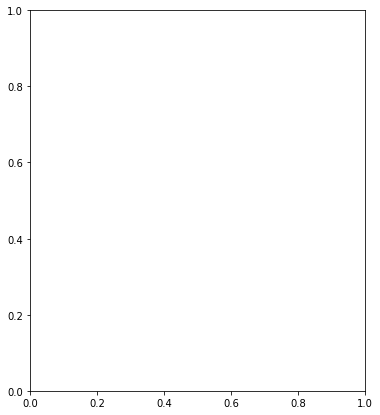

In [ ]:
a = a.reset_index()
a = a.rename(columns={'Unnamed: 0': 'Number of Samples'})
fig, ax = plt.subplots(figsize=(6, 7))

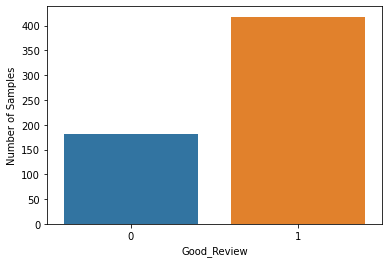

In [ ]:
sns.barplot(x = 'Good_Review', y = "Number of Samples", data = a)


In [ ]:
print(data)

     Unnamed: 0                             Reviewer_designation  \
0             0                 HR Generalist (Former  Employee)   
1             1  Amazon Fulfillment Associate (Former  Employee)   
2             2              Learning Manager (Former  Employee)   
3             3           Warehouse Associate (Former  Employee)   
4             4                       Driver (Current  Employee)   
..          ...                                              ...   
595         595                FC Associate 1 (Former  Employee)   
596         596               Package Handler (Former  Employee)   
597         597              Package Handler (Current  Employee)   
598         598         Fulfillment Associate (Former  Employee)   
599         599   Amazon Warehouse Associate (Current  Employee)   

                         Job_Title   Employee_Status           City  \
0                   HR Generalist    Former Employee         London   
1    Amazon Fulfillment Associate    Form

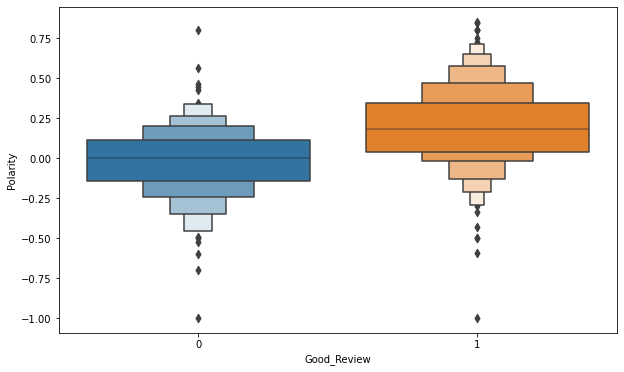

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxenplot(x = 'Good_Review', y= 'Polarity', data = data)

In [ ]:
from wordcloud import WordCloud


In [ ]:
text = " ".join(i.split()[1] for i in data.Comment)
word_cloud = WordCloud(collocations=False, background_color='white').generate(text)

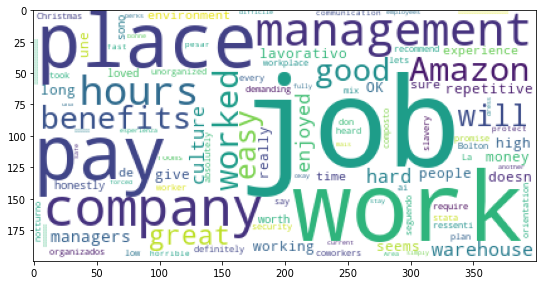

In [ ]:
plt.figure(figsize = (9, 7))
plt.imshow(word_cloud)	


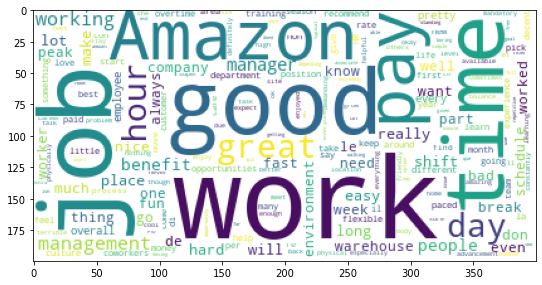

In [ ]:
pos = " ".join(i for i in data['Comment'][data['Good_Review'] == 1])
word_cloud = WordCloud(collocations=False, background_color='white').generate(pos)
plt.figure(figsize = (9, 7))
plt.imshow(word_cloud)

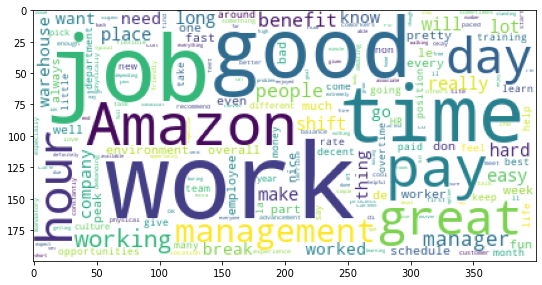

In [ ]:
plt.figure(figsize = (9, 7))
plt.imshow(word_cloud)

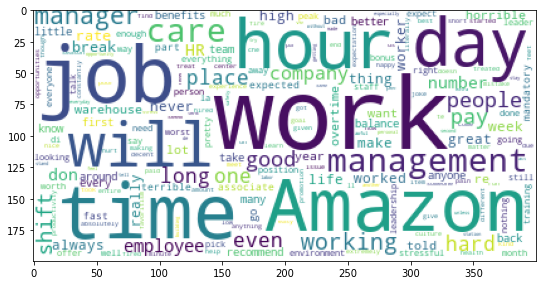

In [ ]:
neg = " ".join(i for i in data['Comment'][data['Good_Review'] == 0])
word_cloud = WordCloud(collocations=False, background_color='white').generate(neg)
plt.figure(figsize = (9, 7))
plt.imshow(word_cloud)

In [ ]:
data.columns


Index(['Unnamed: 0', 'Reviewer_designation', 'Job_Title', 'Employee_Status',
       'City', 'State', 'Full_Location', 'Date', 'Title', 'Comment', 'Pros',
       'Cons', 'User_Rating', 'Company', 'Polarity', 'Subjectivity',
       'Good_Review'],
      dtype='object')

In [ ]:
data.drop(['Unnamed: 0', 'Date', 'City', 'User_Rating', 'Reviewer_designation', 'Company', 'Polarity', 'Subjectivity'], axis = 1, inplace = True)


In [ ]:
data.head()

,Job_Title,Employee_Status,State,Full_Location,Title,Comment,Pros,Cons,Good_Review
0,HR Generalist,Former Employee,Greater London,"London, Greater London",Good place for progression if you can handle t...,"Good for a graduate job, if you want quick pro...","High-ish annual pay, but when you factor in th...","long hours, no organisation, stressful, sink o...",1
1,Amazon Fulfillment Associate,Former Employee,IL,"Monee, IL",Terrible Company,There’s no room for growth if you aren’t the r...,4 day schedule,"Mandatory 60hrs, The pay, The RSU’s no longer ...",0
2,Learning Manager,Former Employee,AB,"Calgary, AB",this company doesn't care about you,"stressful, no balance, not worth it. will make...",,,0
3,Warehouse Associate,Former Employee,MO,"Hazelwood, MO",Very fast paced work environment,It was an okay job. I think my job was very ea...,I liked the 20 min breaks. The Pay was awesome.,"everyone was sore after work, you couldn't rea...",1
4,Driver,Current Employee,FL,"Jacksonville, FL",Cool,Cool coworkers enjoy driving the van. Workout ...,,,1


In [ ]:

data['Reviews'] = data['Job_Title']+' '+data['Employee_Status']+' '+data['Title']+' '+data['Comment']+' '+data['Pros']+' '+data['Cons']

del data['Employee_Status']
del data['Job_Title']
del data['State']
del data['Full_Location']
del data['Title']
del data['Comment']
del data['Pros']	
del data['Cons']


In [ ]:
data.head()

,Good_Review,Reviews
0,1,HR Generalist Former Employee Good place for ...
1,0,Amazon Fulfillment Associate Former Employee ...
2,0,Learning Manager Former Employee this company...
3,1,Warehouse Associate Former Employee Very fast...
4,1,Driver Current Employee Cool Cool coworkers e...


In [ ]:
data.rename(columns={'Good_Review': 'Labels'}, inplace=True)

In [ ]:
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
from nltk.corpus import stopwords

In [ ]:
stop_words = set(stopwords.words("english"))
data['Reviews'] = data['Reviews'].apply(lambda x:x.lower())

In [ ]:
data['Reviews'] = data['Reviews'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

In [ ]:
data.head()

,Labels,Reviews
0,1,hr generalist former employee good place progr...
1,0,amazon fulfillment associate former employee t...
2,0,learning manager former employee company care ...
3,1,warehouse associate former employee fast paced...
4,1,driver current employee cool cool coworkers en...


In [ ]:
X = data.Reviews
y = data.Labels

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Making two datasets like for training and testing
from sklearn.model_selection import train_test_split

#Importing our ML Algorithm for detailed analysis
from sklearn.tree import DecisionTreeClassifier

# Importing accuracy score and another necessary functions
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25)

In [ ]:
vect = CountVectorizer()
vect.fit(X_train)

CountVectorizer()

In [ ]:
X_train_v = vect.transform(X_train)
X_train_v

<450x3536 sparse matrix of type '<class 'numpy.int64'>'
	with 15867 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_v = vect.transform(X_test)
X_test_v

<150x3536 sparse matrix of type '<class 'numpy.int64'>'
	with 4581 stored elements in Compressed Sparse Row format>

In [ ]:
tf_vect = TfidfVectorizer()
tf_vect.fit(X_train)

TfidfVectorizer()

In [ ]:
X_train_tf = tf_vect.transform(X_train)
X_train_tf

<450x3536 sparse matrix of type '<class 'numpy.float64'>'
	with 15867 stored elements in Compressed Sparse Row format>

In [ ]:
X_test_tf = tf_vect.transform(X_test)
X_test_tf

<150x3536 sparse matrix of type '<class 'numpy.float64'>'
	with 4581 stored elements in Compressed Sparse Row format>

In [ ]:
clf = DecisionTreeClassifier()

clf.fit(X_train_tf, y_train)

DecisionTreeClassifier()

In [ ]:
y_pred = clf.predict(X_test_tf)
cm = confusion_matrix(y_test, y_pred)

In [ ]:
print("Accuracy Score: ", accuracy_score(y_test, y_pred))
print("Classification Report: ", classification_report(y_test, y_pred))
print("Confusion Matrix: ", confusion_matrix(y_test, y_pred))

Accuracy Score:  0.7
Classification Report:                precision    recall  f1-score   support

           0       0.57      0.35      0.43        49
           1       0.73      0.87      0.80       101

    accuracy                           0.70       150
   macro avg       0.65      0.61      0.61       150
weighted avg       0.68      0.70      0.68       150

Confusion Matrix:  [[17 32]
 [13 88]]


Text(69.0, 0.5, 'Actual')

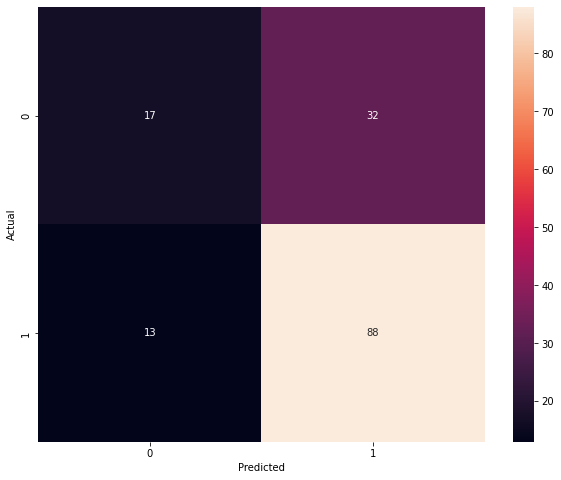

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [ ]:
X_test


505    flex delivery driver former employee fun flexi...
339    warehouse picker & problem solver former emplo...
314    fc associate former employee management hit mi...
175    customer service agent former employee none gr...
434    fullfillment associate former employee product...
                             ...                        
512    magazziniere former employee l'inferno diventi...
133    fulfillment associate former employee warehous...
417    area manager current employee high pace high p...
466    responsable operations logistique l6 current e...
495    amazon fulfillment associate former employee d...
Name: Reviews, Length: 150, dtype: object

In [ ]:
X_test[528]
y_test[528]

0

In [ ]:
# Checking whether our ML Model Is predicting Right or not!

#input_data = ["sortation associate current employee horrible managers pick reasons. threaten fire smallest things. power trip actually appreciating employees. effort connect engage employees. sad place work at."]

input_data=["learning manager former employee company care stressful, balance, worth it. make work crazy hours pay you. incentive leadership, care you, matters get work done"]
input_data_features = tf_vect.transform(input_data)

prediction = clf.predict(input_data_features)
print(prediction)

if prediction[0] == 1:
  print("Positive Review")
else:
  print("Negative Review")


[0]
Negative Review
